# Caribbean Region Weather Forecasting

## Feature Engineering - Choosing Lags

In this part of Feature Engineering section, we will focus on determining the quantity and quality of Lags required for forecasting.

- Lags: in time series forecasting, we use lag features - past values of the variable - to help predict the future. 

We need to choose an optimal number of lags as too few lags lead to a shortsighted model, and the opposite to an overwhelmed and overfitted model.

The two imporant tools for understanding the relationship between observations at different times in the past are Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF). 

*What is Autocorrelation?*

Autocorrelation, aka serial correlation, measures the relationship between a time series and lagged version of itself over a successive period of time. In other words, it tells how similar the data points are to each other at different times.

Previous notebooks in the same series of forecasting Caribbean Climate:

[01-download-and-data-wrangling.ipynb](01-download-and-data-wrangling.ipynb)

[02-descriptive-stats.ipynb](02-descriptive-stats.ipynb)

[03-EDA-temperature-anomaly.ipynb](03-EDA-temperature-anomaly.ipynb)

[04-EDA-precipitation.ipynb](04-EDA-precipitation.ipynb)

[05-combined-correlations.ipynb](05-combined-correlations.ipynb)

**Author:** Nazgul Sagatova  
**Last updated:** 2025-12-4 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

from utils import load_caribbean_weather

df = load_caribbean_weather()

## Temperature Anomaly

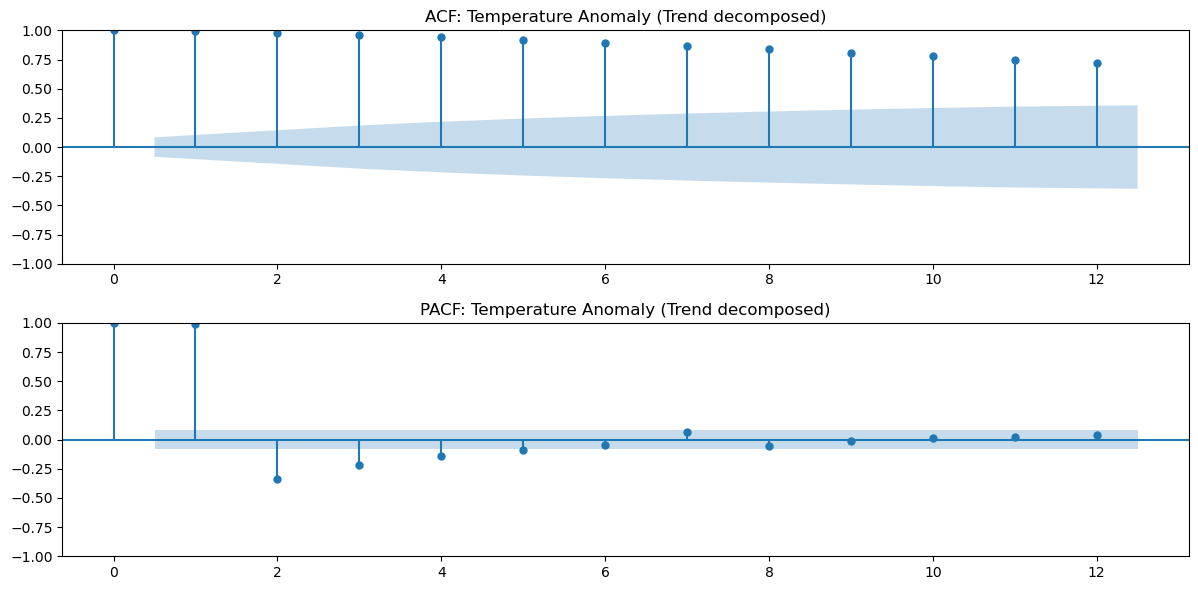

In [8]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

lag = 12

plot_acf(df['temp_trend'].dropna(), lags=lag, ax=ax1, title='ACF: Temperature Anomaly (Trend decomposed)')
plot_pacf(df['temp_trend'].dropna(), lags=lag, ax=ax2, title='PACF: Temperature Anomaly (Trend decomposed)')

plt.tight_layout()
plt.show()

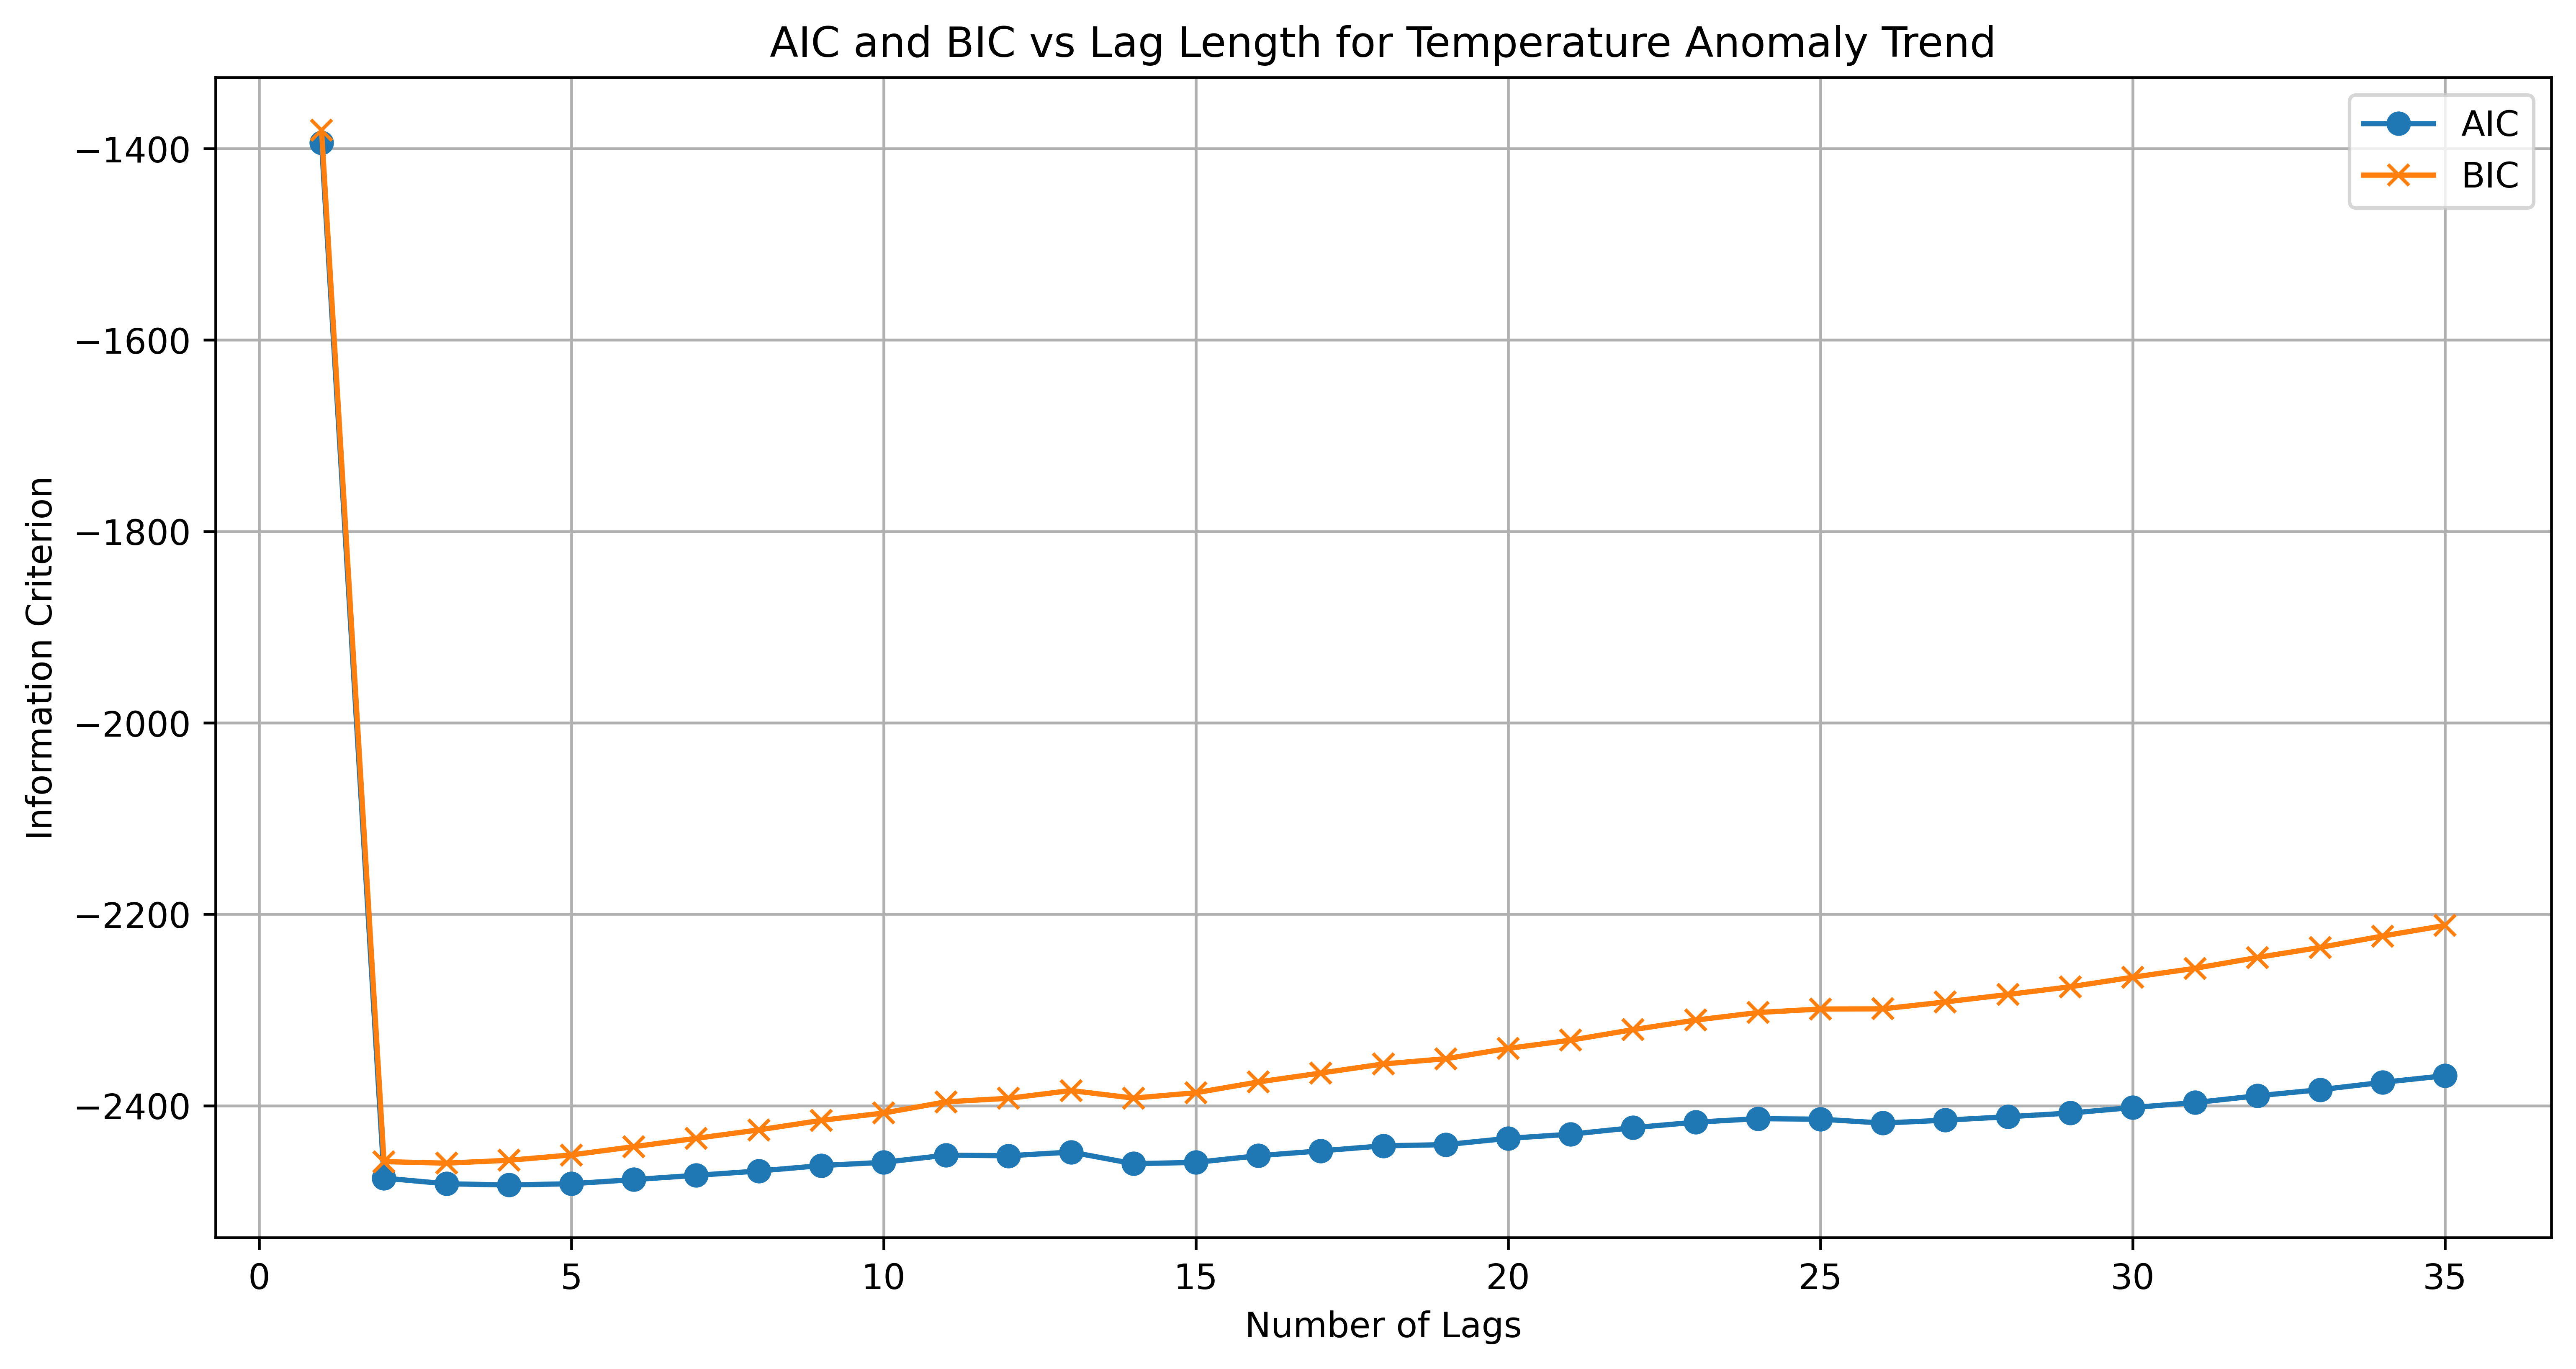

In [11]:

# AIC/BIC evaluation Temperature
aic_vals, bic_vals = [], []
lags = range(1, 36)
for lag in lags:
    model = AutoReg(df['temp_trend'], lags=lag).fit()
    aic_vals.append(model.aic)
    bic_vals.append(model.bic)

# Plot AIC and BIC
plt.figure(figsize=(12, 6), dpi = 600)
plt.plot(lags, aic_vals, label='AIC', marker='o')
plt.plot(lags, bic_vals, label='BIC', marker='x')
plt.xlabel('Number of Lags')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC vs Lag Length for Temperature Anomaly Trend')
plt.legend()
plt.grid(True)
plt.show()

## Precipitation

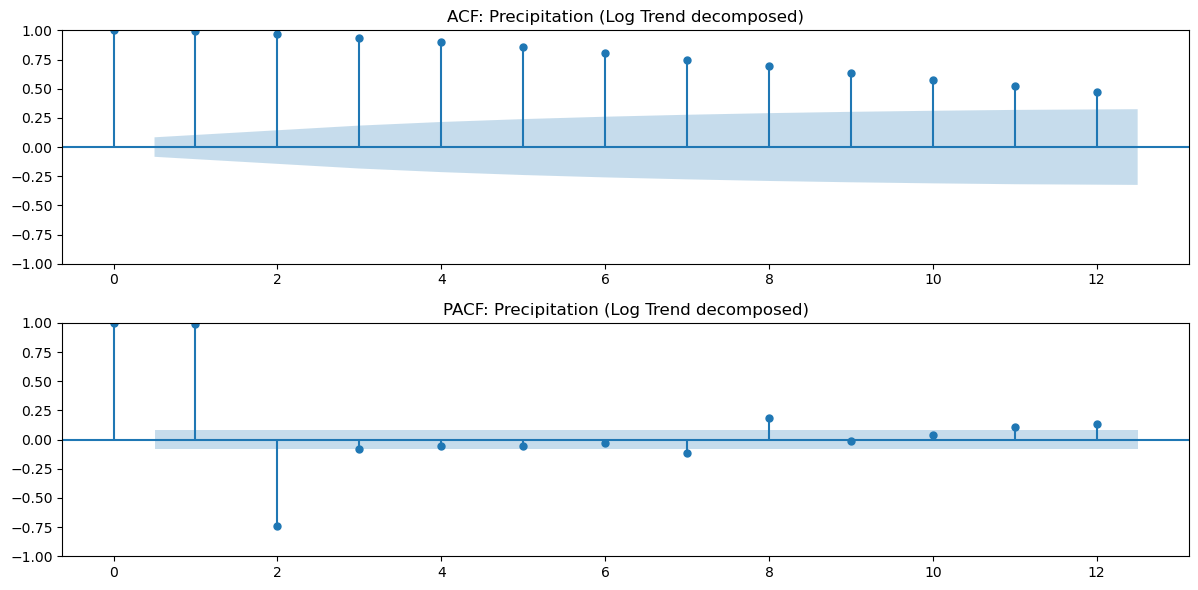

In [12]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

lag = 12

plot_acf(df['precip_trend_log'].dropna(), lags=lag, ax=ax1, title='ACF: Precipitation (Log Trend decomposed)')
plot_pacf(df['precip_trend_log'].dropna(), lags=lag, ax=ax2, title='PACF: Precipitation (Log Trend decomposed)')

plt.tight_layout()
plt.show()

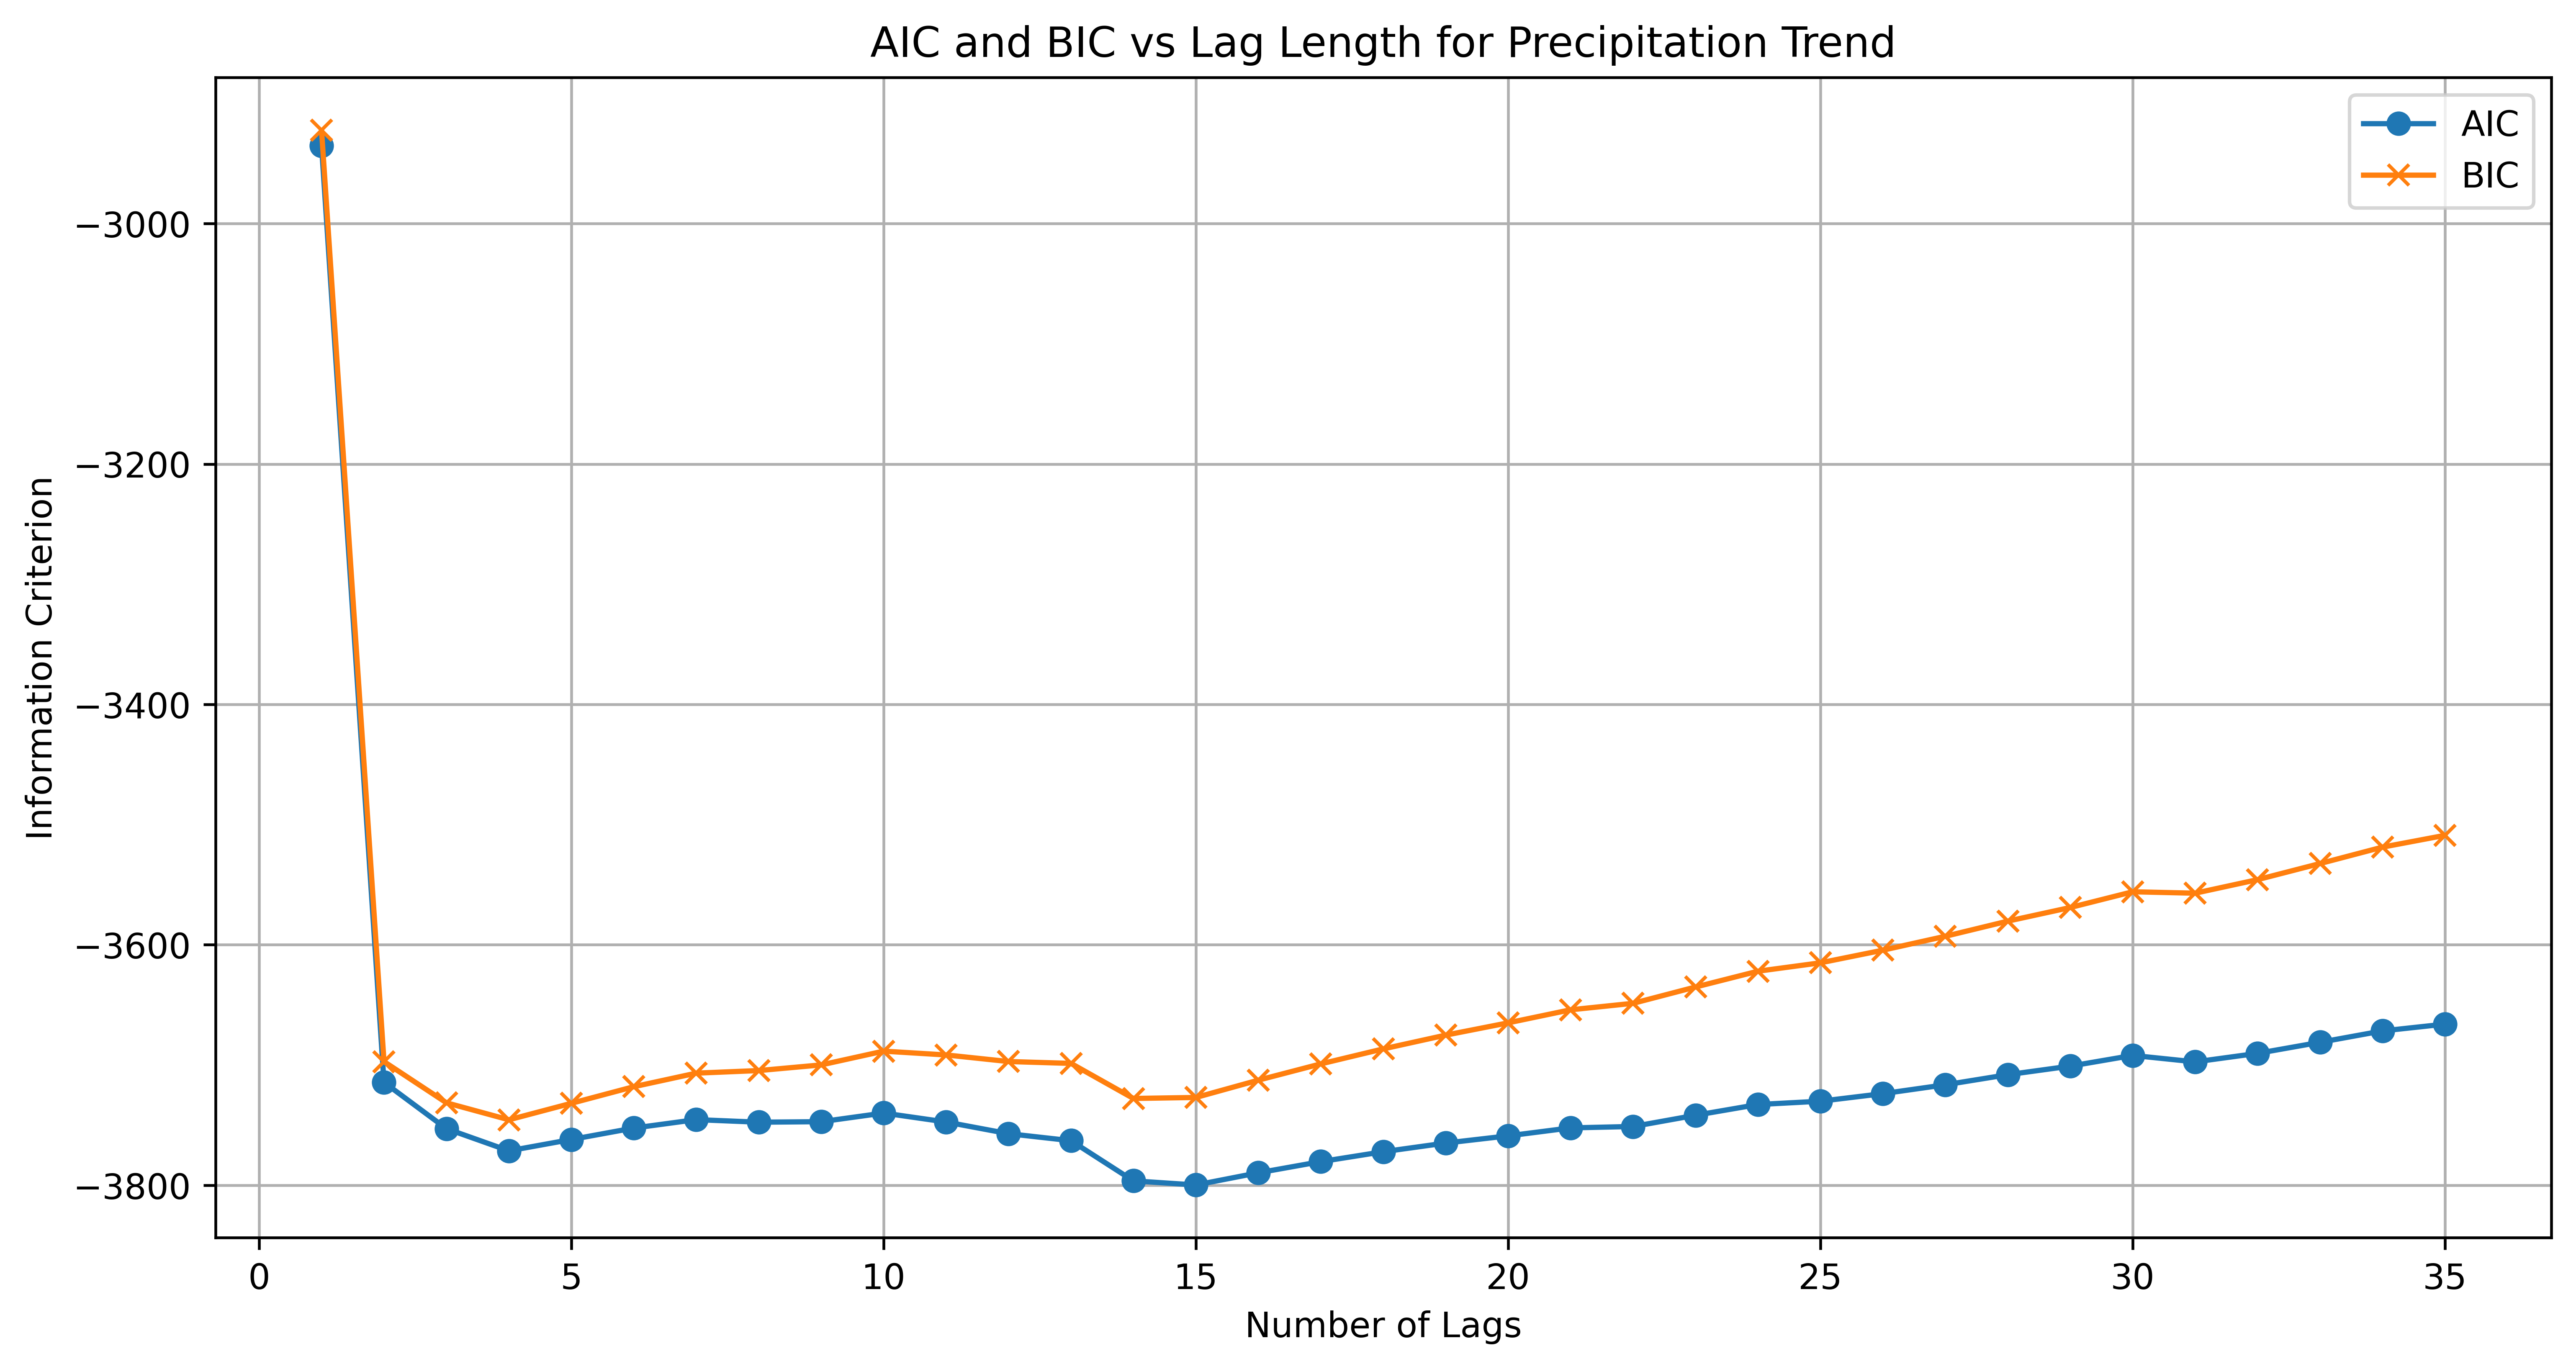

In [13]:

# AIC/BIC evaluation Temperature
aic_vals, bic_vals = [], []
lags = range(1, 36)
for lag in lags:
    model = AutoReg(df['precip_trend_log'], lags=lag).fit()
    aic_vals.append(model.aic)
    bic_vals.append(model.bic)

# Plot AIC and BIC
plt.figure(figsize=(12, 6), dpi = 600)
plt.plot(lags, aic_vals, label='AIC', marker='o')
plt.plot(lags, bic_vals, label='BIC', marker='x')
plt.xlabel('Number of Lags')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC vs Lag Length for Precipitation Trend')
plt.legend()
plt.grid(True)
plt.show()

## Adding lag features to the original dataframe

In [14]:
df['temp_trend_lag1'] = df['temp_trend'].shift(1)
df['precip_trend_log_lag1'] = df['precip_trend_log'].shift(1)
df['precip_trend_log_lag2'] = df['precip_trend_log'].shift(2)

In [16]:
# Final save — everyone will read this file
df.to_parquet("../data/processed/caribbean_temp_precip_1980_2025.parquet", index=True)
print("Processed dataset saved → ready for EDA notebooks")

Processed dataset saved → ready for EDA notebooks


# Lags Insights

- Temperature anomaly seems to benefit from lag 1.
- Precipitation can use lag 1 and 2.